# 9.3 文章摘要及文字雲 

## sumy：對網頁或文章進行摘要

資料來源：{cite}`Python實戰聖經_碁峰`

> !pip install sumy

In [2]:
import nltk

nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [3]:
from sumy.parsers.html import HtmlParser
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer as Summarizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words

In [5]:
LANGUAGE = "chinese"
# LANGUAGE = "english"
SENTENCES_COUNT = 5
# SENTENCES_COUNT = 10
url = "https://news.ltn.com.tw/news/life/breakingnews/3649202"
# url = "https://en.wikipedia.org/wiki/Automatic_summarization"
parser = HtmlParser.from_url(url, Tokenizer(LANGUAGE))
summarizer = Summarizer(Stemmer(LANGUAGE))
summarizer.stop_words = get_stop_words(LANGUAGE)
sumies = summarizer(parser.document, SENTENCES_COUNT)
for i, sentence in enumerate(sumies):
    print("{}. {}".format(i + 1, sentence))

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\User\AppData\Local\Temp\jieba.cache
Loading model cost 0.390 seconds.
Prefix dict has been built successfully.


1. 2021/08/24 20:07〔記者吳俊鋒／台南報導〕台南仁德區的保華宮，結合中元普度，與社會大眾聯手募集愛心供品，包含1800斤的白米，以及各式生活物資，祭拜後，今天一併發放給低收入戶，照顧弱勢，讓民間傳統習俗也兼具慈善公益的意義。
2. 保華宮主委黃翠雲指出，農曆7月也是慈悲月，今年適逢防疫警戒，呼籲信眾以代購普品的方式，做好中元祭拜，並降低群聚風險，還號召活動之後捐助給有需要幫助的⼈，廟方抱持感恩的心，善盡社會責任，獲得熱烈迴響。
3. 仁德區公所轄內列冊的低收入家庭有237戶，保華宮準備豐盛的供品，宴請四方好兄弟，並將募集的愛心米，連同麵食、罐頭、油品等物資一起捐助弱勢，今天在廟內發放。
4. 該廟還提供了環保袋，將救濟物資裝好，讓低收入戶方便領取，市議員吳禹寰也到場協助發放，並呼籲社會各界，疫情期間，弱勢生活大不易，需要更多關懷。
5. 仁德區保華宮將中元普度結合愛心公益，捐助弱勢。


In [7]:
LANGUAGE = "chinese"
SENTENCES_COUNT = 5
parser = PlaintextParser.from_file("ch09/article1.txt", Tokenizer(LANGUAGE))
summarizer = Summarizer(Stemmer(LANGUAGE))
summarizer.stop_words = get_stop_words(LANGUAGE)
sumies = summarizer(parser.document, SENTENCES_COUNT)
for i, sentence in enumerate(sumies):
    print("{}. {}".format(i + 1, sentence))

1. 直到有一天，老公公被証實患上癌症，現在，他除了要克服生活的不便外，還要接受物理治療和疾病帶來的痛楚。
2. 』 可能疾病初期帶來的痛楚不大，但到後期，一個體弱的老人家還熬得下去嗎？
3. 』 老婆婆微笑回答：『一個大男人，要妻子每天清理大小二便的，還在逞強呢！
4. 護士很詫異，她衝口而出地對老公公說： 『我們都以為你是因為不捨得老婆婆才那麼堅強地活下去呢！
5. 』 老公公又接著說：『這妮子呀，我從和她結婚那天起便對自己許諾，一輩子都不讓她哭泣的，大約她不知道吧，那次她看見我在床上捲曲，哭了起來，那時我的痛苦，比病魔對我的折磨還要難受......，白頭到老嘛，我們做到了，遺憾的是，我始終令她為我哭過一次......。


## wordcloud：文字雲

Building prefix dict from D:\REPO_GITHUB_OET\pydata\wordcloud\Python實戰聖經_碁峰\ch09\dict.txt.big.txt ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.u31f7736fe6e59019fd3c6ee97845f32c.cache
Loading model cost 0.654 seconds.
Prefix dict has been built successfully.


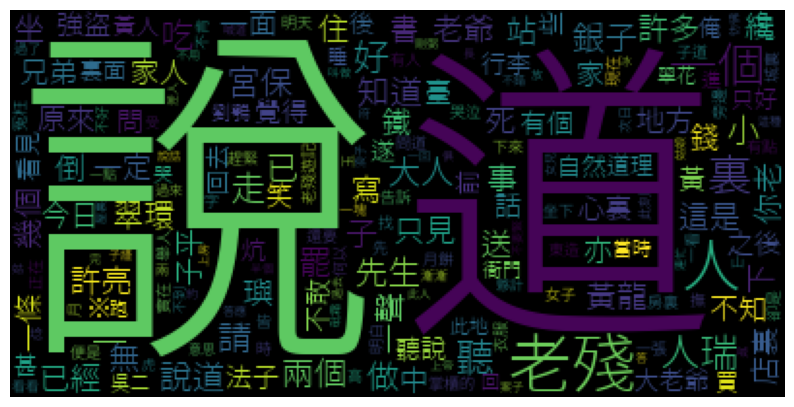

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
from collections import Counter
from PIL import Image
import numpy as np
import requests

text = open("ch09/travel.txt", "r", encoding="utf-8").read()
jieba.set_dictionary("ch09/dict.txt.big.txt")
# with open("ch09/stopWord_cloud.txt", "r", encoding="utf-8-sig") as f:
with open("ch09/stopWord_cloudmod.txt", "r", encoding="utf-8-sig") as f:
    stops = f.read().split("\n")
    # Remove any empty strings that might appear from trailing newlines
    # stops = [word for word in stops if word.strip()]
terms = []
for t in jieba.cut(text, cut_all=False):
    # if t not in stops:
    if t.strip() and t not in stops:  # Fix multiline issue
        terms.append(t)
diction = Counter(terms)
fontfile = requests.get(
    "https://drive.google.com/uc?id=1QdaqR8Setf4HEulrIW79UEV_Lg_fuoWz&export=download"
)
with open("taipei_sans_tc_beta.ttf", "wb") as f:
    f.write(fontfile.content)
wordcloud = WordCloud(font_path="taipei_sans_tc_beta.ttf")

# Add boundary shape of world cloud
# mask = np.array(Image.open("ch09/heart.png"))
# wordcloud = WordCloud(background_color="white",mask=mask,font_path='taipei_sans_tc_beta.ttf')

wordcloud.generate_from_frequencies(frequencies=diction)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file("bookCloud2.png")

## References
```{bibliography}